In [28]:
# Always run imports at the top level

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import subplots


In [3]:
import statsmodels.api as sm

In [4]:
# can import only a few items from library, keeping the namespace clean 
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm 

In [5]:
from ISLP import load_data 
from ISLP.models import (ModelSpec as MS, 
                         summarize, 
                         poly)

### Applied Questions: 
8. This question involves the use of simple linear regression on the Auto data set.  
   
   a) Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summarize()` function to print the results. Comment on the output. For example:  
      
      i. Is there a relationship between the predictor and the response?  
      ii. How strong is the relationship between the predictor and the response?  
      iii. Is the relationship between the predictor and the response positive or negative?  
      iv. What is the predicted `mpg` associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?  
   
   b) Plot the response and the predictor in a new set of axes `ax`. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.  
   
   c) Produce some of the diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.  

8. (ANSWER)

    a) Let's look at the answer.

    i. Since the p-value for this predictor is zero, there is a relationship.

    ii. The F-statistic here is 599.7 and is far larger than 1. The associated p-value is 0. This provides strong evidence against the null hypothesis.

    iii. The relationship is negative since the coefficient, $\hat{\beta}_{\text{horsepower}} = -0.1578$.

    b) See Figure 8.1 below. 

    c) In Figure 8.2 below, we see that the plot of residual vs. fitted values shows that there is evidence of non-linearity with the strong U-shape curve. 

In [10]:
# Load in data 
from pathlib import Path 
path_to_data = Path.cwd() / 'data'
file = 'Auto.csv'
auto = pd.read_csv(path_to_data/file, na_values=['?'])
auto = auto.dropna()
auto.shape
X = MS(['horsepower']).fit_transform(auto)
y = auto['mpg']
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [7]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


**Table 8.1** Shows the coefficients of the least squares model for regression of mpg onto horsepower. 

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 12 May 2025   Prob (F-statistic):           7.03e-81
Time:                        16:43:07   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Table 8.2** Shows a more extensive output for the regression results including the F-statistic and $R^2$. 

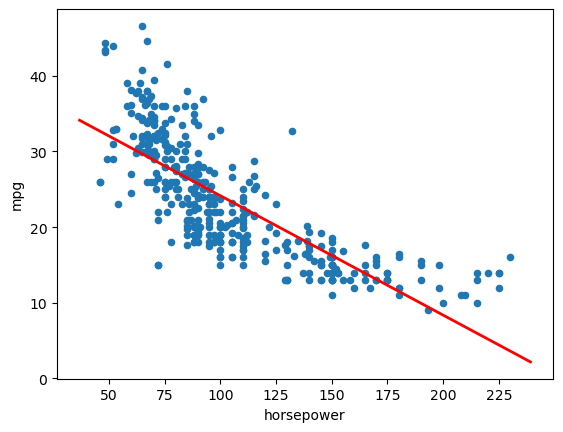

In [18]:
def abline(ax, b, m, *args, **kwargs): 
 "Add a line with slop m and intercept b to ax"
 xlim = ax.get_xlim()
 ylim = [m * xlim[0] + b, m * xlim[1] + b]
 ax.plot(xlim, ylim, *args, **kwargs)

ax = auto.plot.scatter('horsepower', 'mpg')
abline(ax, results.params.values[0], results.params.values[1], 'r', linewidth=2);

**Figure 8.1** Least squares fit for regressing predictor horsepower onto mpg. 

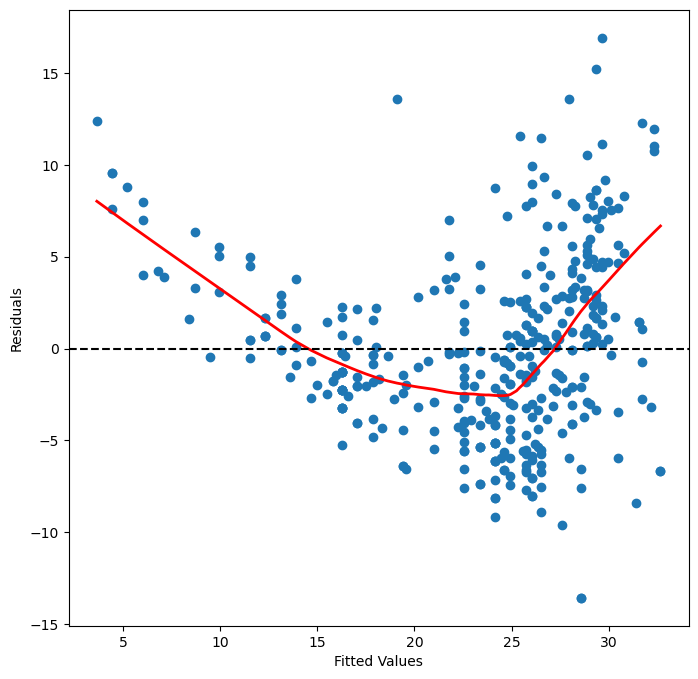

In [19]:
lowess = sm.nonparametric.lowess
smth = lowess(results.resid, results.fittedvalues, frac=0.5)
fig, ax = subplots(figsize=(8,8))
ax.scatter(results.fittedvalues, results.resid)
ax.plot(smth[:, 0], smth[:, 1], color='red', lw=2)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.axhline(0, c='k', ls='--');

**Figure 8.2** Residual versus fitted values. We see with the residual plot there is evidence of non-linearity. 

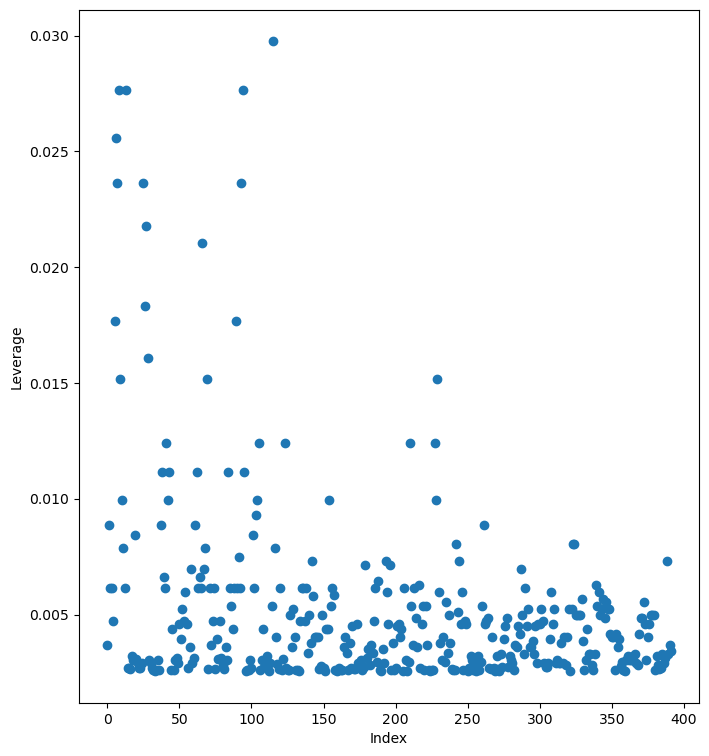

In [20]:
infl = results.get_influence()
ax = subplots(figsize=(8, 9))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage');

**Figure 8.3** Leverage values versus data indices.  

9. This question involves the use of multiple linear regression on the Auto data set.  
   
   a) Produce a scatterplot matrix which includes all of the variables in the data set.  
   
   b) Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.  
   
   c) Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summarize()` function to print the results. Comment on the output. For instance:  
      
      i. Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.  
      ii. Which predictors appear to have a statistically significant relationship to the response?  
      iii. What does the coefficient for the `year` variable suggest?  
   
   d) Produce some of the diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?  
   
   e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?  
   
   f) Try a few different transformations of the variables, such as `log(X)`, `√X`, `X²`. Comment on your findings.  


9. (ANSWER)

    a) See Figure 9.1.


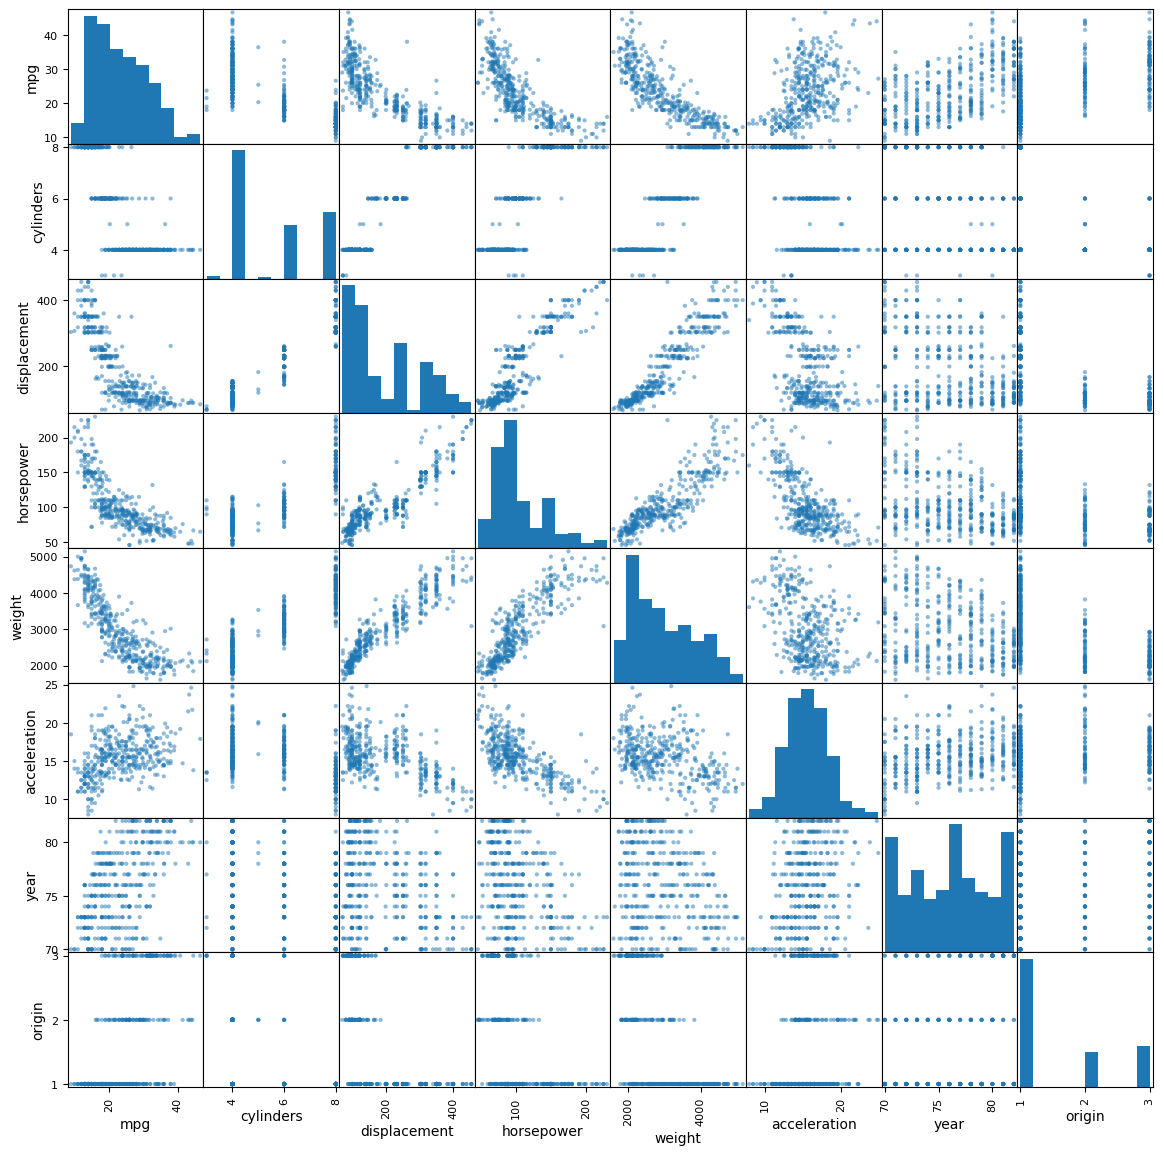

In [22]:
pd.plotting.scatter_matrix(auto, figsize=(14, 14));

**Figure 9.1** Auto data scatter plot. We can see evidence of a non-linearity for $mpg$ vs $displacement$, $mpg$ vs $horsepower$, and $mpg$ vs $weight$.

9. (ANSWER)
  
    b) See Table 9.1. 


In [23]:
auto.drop(columns=['name'], inplace=True)
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


**Table 9.1** This is the output of the correlation function in pandas in the auto dataset after dropping the 'name' column. 

9. (ANSWER)

    c) 

    i) It appears in Table 9.3 the F-stat is 77.28 and so the model is statistically significant. 


In [24]:
print(auto.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')


In [25]:
auto.drop(columns=['mpg'], inplace=True)
X = MS(auto.columns).fit_transform(auto)
results_multiple = sm.OLS(y, X).fit()
summarize(results_multiple)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [26]:
results_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 12 May 2025   Prob (F-statistic):          2.04e-139
Time:                        16:55:16   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Table 9.2** We see that the highest p-value is for the predictor $acceleration$. We can confirm this through the corrlation value being the lowest and so this predictor has the lowest association with the outcome, $mpg$. 

In [27]:
anova_lm(results, results_multiple)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


**Table 9.3** We can see that the F-stat is 77.28 for the full model and the associated p-value is zero.  Therefore, the model is significant. 

ii) The predictors that appear to have a statistically significant relationship to the response are displacement, year, weight, and origin. The p-values that are associated with these predictors are zero. 

iii) The coefficient for year is $\beta_{\text{year}}=0.75$, which means for every year the mpg increases by 0.75. 

9. (ANSWER)
    
    d) See Figure 9.2. 


13


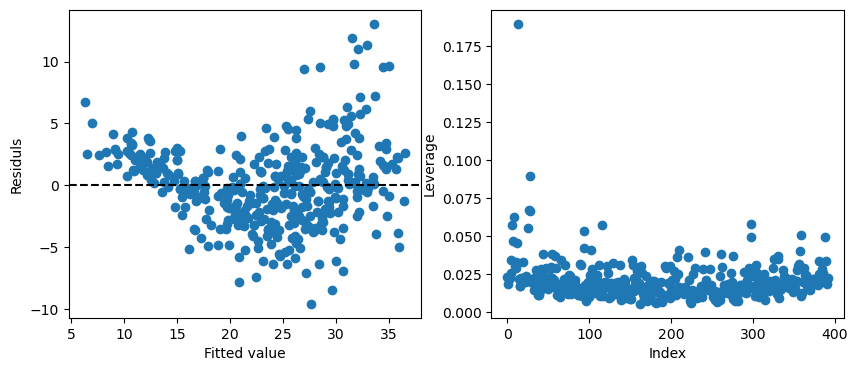

In [ ]:
nrows, ncols = 1, 2
fig, ax = subplots(nrows=nrows, ncols=ncols, figsize=(10, 4))
ax[0].scatter(results_multiple.fittedvalues, results_multiple.resid)
ax[0].set_xlabel('Fitted value')
ax[0].set_ylabel('Residuls')
ax[0].axhline(0, c='k', ls='--'); 
infl = results_multiple.get_influence()
ax[1].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Leverage')
print(np.argmax(infl.hat_matrix_diag))


**Figure 9.2** We can see that there is a strong pattern in the residuals that indicates non-linearity in data. Also, there is a high leverage for the value at index 13. 

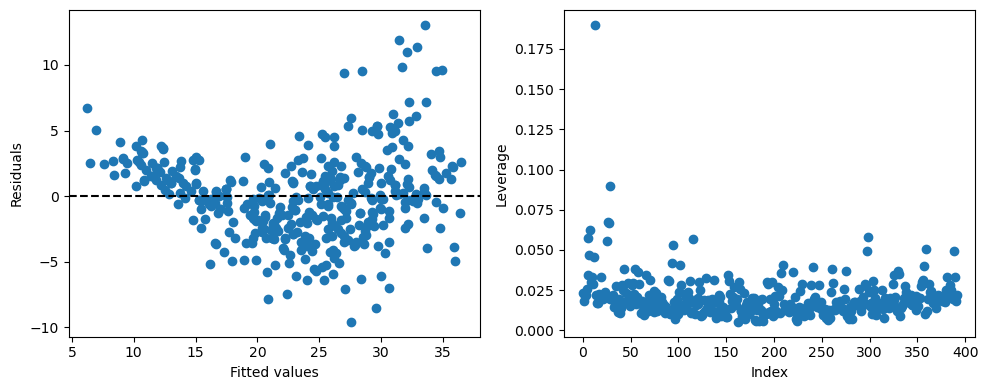

Max leverage at index: 13


In [29]:
## Another way to re-factor above code; cleaner/clearer
# 

import matplotlib.pyplot as plt

# Another way to do this; nicer/cleaner code
infl = results_multiple.get_influence()
leverages = infl.hat_matrix_diag
n = len(leverages)

# Describe each subplot in a list of dicts
plots = [
    {
        "x": results_multiple.fittedvalues, 
        "y": results_multiple.resid, 
        "xlabel": "Fitted values", 
        "ylabel": "Residuals", 
        "hline": True,
    },
    {
        "x": np.arange(n), 
        "y": leverages, 
        "xlabel": "Index", 
        "ylabel": "Leverage", 
        "hline": False,

    },
]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, spec in zip(axes, plots):
    ax.scatter(spec["x"], spec["y"])
    ax.set_xlabel(spec["xlabel"])
    ax.set_ylabel(spec["ylabel"])
    if spec["hline"]: 
        ax.axhline(0, color="k", linestyle="--")

plt.tight_layout()
plt.show()

# print the max leverages
print("Max leverage at index:", np.argmax(leverages)) 

9) (ANSWER)

    e) Please see Table 9.4. More generally, how do I pick interaction terms for the model? Lean on domain knowledge first.Ask yourself: “For which pairs of predictors do I expect the effect on mpg to change depending on the other variable?”

    - Horsepower × Weight: A heavy car needs more power to move, so the mpg‐loss per horsepower might be bigger for heavy cars than for light ones.
    
    - Displacement × Cylinders: Big engines with many cylinders may behave differently than big engines with few cylinders
    
    - Year × Origin: Improvements over model years may differ by the car’s country of origin.

    Note: each coefficient’s p-value tests “If all the other predictors are truly irrelevant, is there still evidence that this one has an effect?” So a high p-value can come from:
    
    - No true effect of that variable,

    - Low signal‐to‐noise in that predictor, or

    - Multicollinearity (two predictors move together so tightly that neither can stand out).

    So, we can do the following: 
    
    - Look at p-values to spot weak individual effects
     
    - Use nested F-tests (anova_lm) to judge blocks of variables
    
    - Check VIFs if collinearity is an issue

    - Consider PCA or regularization to combine correlated predictors

In [ ]:
predictors = list(auto.columns)
predictors += [('weight', 'horsepower'), 
               ('year', 'origin'),
               ('displacement', 'cylinders')]
print(predictors)
X_interact = MS(predictors).fit_transform(auto)
results_interact = sm.OLS(y, X_interact).fit()
summarize(results_interact)

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', ('weight', 'horsepower'), ('year', 'origin'), ('displacement', 'cylinders')]


,coef,std err,t,P>|t|
intercept,21.618900,8.239000,2.624,0.009
cylinders,-0.931500,0.486000,-1.917,0.056
displacement,-0.028900,0.016000,-1.794,0.074
horsepower,-0.192600,0.027000,-7.051,0.000
weight,-0.009600,0.001000,-10.135,0.000
acceleration,-0.051800,0.089000,-0.584,0.559
year,0.536100,0.102000,5.270,0.000
origin,-10.123200,4.262000,-2.375,0.018
weight:horsepower,0.000043,0.000007,6.093,0.000
year:origin,0.139200,0.055000,2.548,0.011


In [31]:
summarize(results_interact)

,coef,std err,t,P>|t|
intercept,21.618900,8.239000,2.624,0.009
cylinders,-0.931500,0.486000,-1.917,0.056
displacement,-0.028900,0.016000,-1.794,0.074
horsepower,-0.192600,0.027000,-7.051,0.000
weight,-0.009600,0.001000,-10.135,0.000
acceleration,-0.051800,0.089000,-0.584,0.559
year,0.536100,0.102000,5.270,0.000
origin,-10.123200,4.262000,-2.375,0.018
weight:horsepower,0.000043,0.000007,6.093,0.000
year:origin,0.139200,0.055000,2.548,0.011


**Table 9.4** The $\text{weight x horsepower}$ interaction effect appears to be statistically significant with it's p-value near 0. A p-value below your 0.05 indicates that predictor has a statistically significant linear effect on mpg, holding all others predictors constant.The other interaction terms are also statistically significant, or $\text{p-value}<0.05$.

In [32]:
results_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     244.8
Date:                Mon, 12 May 2025   Prob (F-statistic):          4.43e-159
Time:                        16:59:29   Log-Likelihood:                -968.25
No. Observations:                 392   AIC:                             1958.
Df Residuals:                     381   BIC:                             2002.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 21.6189      8.239      2.624      0.009       5.419      37.818
cylinders                 -0.9315      0.486     -1.917      0.056      -1.887       0.024
displacement              -0.0289      0.016     -1.794      0.074      -0.061       0.003
horsepower                -0.1926      0.027     -7.051      0.000      -0.246      -0.139
weight                    -0.0096      0.001    -10.135      0.000      -0.011      -0.008
acceleration              -0.0518      0.089     -0.584      0.559      -0.226       0.122
year                       0.5361      0.102      5.270      0.000       0.336       0.736
origin                   -10.1232      4.262     -2.375      0.018     -18.503      -1.744
weight:horsepower         4.3e-05   7.06e-06      6.093      0.000    2.91e-05    5.69e-05
year:origin                0.1392      0.055      2.548      0.011       0.032       0.247
displacement:cylinders     0.0049      0.002      2.240      0.026       0.001       0.009
==============================================================================
Omnibus:                       42.272   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.981
Skew:                           0.610   Prob(JB):                     5.81e-19
Kurtosis:                       4.911   Cond. No.                     2.49e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Table 9.4** We can see in the summary using the interaction terms the p-values are lower. Also, the $R^2$ is 0.865 compared to 0.821 for without or a higher percentage in variablility 87% versus 82% can be explained by $X$ when we include interaction terms. 

9. (ANSWER)

    f) It appears from the scatter plot that there is a non-linear pattern between mpg and the following predictors: displacement, horsepower, weight. Let's first do a degree 2 polynomial transformation on each predictior and look at the summary stats and see how the two models compare. Then we can also try doing square root, and log transformations. 

    Note: Use plain $R^2$ if you just want a sense of fit quality in a single model, and you’re not comparing alternative specifications. Use adjusted $R²$ (or better yet, AIC/BIC) whenever you’re:
     
     - comparing models with different numbers of predictors, or
     
     - worried about overfitting by piling on variables that add no real explanatory power.

In [19]:
# These are the base predictors 
base_preds = ['cylinders', 'acceleration', 'year','origin', 'displacement', 'horsepower', 'weight']

# These are the predictors we will do our transformations on 
transform_preds = ['displacement', 'horsepower', 'weight']
for pred in transform_preds: 
    auto[f'{pred}_sq'] = (auto[pred])**2
    auto[f'{pred}_sqrt'] = np.sqrt(auto[pred])
    auto[f'{pred}_log'] = np.log(auto[pred])

def fit_and_transform(suffix): 
    if suffix == 'lin': 
        X = MS(base_preds).fit_transform(auto)
    preds = base_preds + [f'{pred}_{suffix}' for pred in transform_preds]
    X = MS(preds).fit_transform(auto)
    model = sm.OLS(auto['mpg'], X).fit()
    print(f'Transform: {suffix}')
    print(f'Adjusted r squared: {model.rsquared_adj: .6f}')
    print(model.summary().tables[1])
    print()

for suffix in ['lin', 'sq', 'sqrt', 'log']: 
    fit_and_transform(suffix)

Transform: lin
Adjusted r squared:  0.818224
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders           -0.4934      0.323     -1.526      0.128      -1.129       0.142
acceleration         0.0806      0.099      0.815      0.415      -0.114       0.275
year                 0.7508      0.051     14.729      0.000       0.651       0.851
origin               1.4261      0.278      5.127      0.000       0.879       1.973
displacement         0.0099      0.004      2.647      0.008       0.003       0.017
horsepower          -0.0085      0.007     -1.230      0.220      -0.022       0.005
weight              -0.0032      0.000     -9.929      0.000      -0.004      -0.003
displacement_lin     0.0099      0.004      2.647      0.008       0.003       0.017
horsepower_lin      

**Table 9.5** The best $R^2$ value we got through the trasformation is for the sq transformation. 

10. This question should be answered using the Carseats data set.

    a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

    b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

    c) Write out the model in equation form, being careful to handle the qualitative variables properly.

    d) For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?

    e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

    f) How well do the models in (a) and (e) fit the data?

    g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

    h) Is there evidence of outliers or high leverage observations in the model from (e)?

10) (ANSWER)

    a)

In [7]:
from pathlib import Path 
path_to_data = Path.cwd() / 'data'
file = 'Carseats.csv'
carseats = pd.read_csv(path_to_data/file)
# Get info for data 
carseats.info()
# Does any column contain atleast one na? 
carseats.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [10]:
# If we are using the raw data change dtype of 'object' to 'categorical' 
category_cols = ['ShelveLoc', 'Urban', 'US']
for c in category_cols: 
    carseats[c] = carseats[c].astype('category')
# Now we can use Model Spec 
X = MS(['ShelveLoc', 'Urban', 'US']).fit_transform(carseats)

X.head()

,intercept,ShelveLoc[Good],ShelveLoc[Medium],Urban[Yes],US[Yes]
0,1.0,0.0,0.0,1.0,1.0
1,1.0,1.0,0.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0
3,1.0,0.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Another way to do this using get_dummies() from pandas 

# Get the numeric predictors 
numeric = carseats.select_dtypes(include='number').drop('Sales', axis=1)

# One-hot encode categories and drop the first level to reduce collinearity
dummies = pd.get_dummies(carseats[['ShelveLoc', 'Urban', 'US']], 
                         drop_first=True)

# Concatenate together and add an intercept 
X = pd.concat([numeric, dummies], axis=1)
X = sm.add_constant(X)

X.head()

,const,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,1.0,138,73,11,276,120,42,17,False,False,True,True
1,1.0,111,48,16,260,83,65,10,True,False,True,True
2,1.0,113,35,10,269,80,59,12,False,True,True,True
3,1.0,117,100,4,466,97,55,14,False,True,True,True
4,1.0,141,64,3,340,128,38,13,False,False,True,False


In [16]:
# Why are we dropping the first level? 
df = pd.DataFrame({
    'fruit': ['apple', 'banana', 'cherry', 'apple', 'cherry']
})

dummies_all = pd.get_dummies(df['fruit'])

# Add dummies to the dataframe 
df_all = df.join(dummies_all)

df_all.head()

# Add 'add_dummies' column to show it's the rows always add up to 1
df_all['add_dummies'] = df_all[dummies_all.columns].sum(axis=1)

print('Without dropping first level:')
print(df_all) 

# One-hot encode with dropping the first level 
dummies_drop = pd.get_dummies(df['fruit'], drop_first='True')
df_drop = df.join(dummies_drop)
df_drop['sum_of_dummies'] = df_drop[dummies_drop.columns].sum(axis=1)

print('\nWith dropping first level:')
print(df_drop) 


Without dropping first level:
    fruit  apple  banana  cherry  add_dummies
0   apple   True   False   False            1
1  banana  False    True   False            1
2  cherry  False   False    True            1
3   apple   True   False   False            1
4  cherry  False   False    True            1

With dropping first level:
    fruit  banana  cherry  sum_of_dummies
0   apple   False   False               0
1  banana    True   False               1
2  cherry   False    True               1
3   apple   False   False               0
4  cherry   False    True               1


Without drop_first: the three dummy columns (apple, banana, cherry) always sum to 1—exactly the same as an intercept column ⇒ collinearity since:

Intercept ≡ apple + banana + cherry.

With drop_first=True: one level (apple) is dropped, so the two remaining dummies sum to 0 or 1, not a constant ⇒ no collinearity since we've dropped the first level, their sum vaies between 0 and 1. 

This breaks the linear dependency with the intercept and keeps the design matrix full rank. 

In [ ]:
# Here's without dropping the row, with intercept col
A = np.array([[1, 0, 0, 1], 
              [0, 1, 0, 1],
              [0, 0, 1, 1], 
              [1, 0, 0, 1], 
              [0, 0, 1, 1]])
print('The shape of matrix A is:', np.shape(A))
print('Rank of A without dropping:', np.linalg.matrix_rank(A))

# Here's with dropping the first level, with intercept col 
A = np.array([[0, 0, 1], 
              [1, 0, 1],
              [0, 1, 1], 
              [0, 0, 1], 
              [0, 1, 1]])
print('\nThe shape of matrix A is:', np.shape(A))
print('Rank of A without dropping:', np.linalg.matrix_rank(A))

The shape of matrix A is: (5, 4)
Rank of A without dropping: 3

The shape of matrix A is: (5, 3)
Rank of A without dropping: 3


Here we see that the column rank is full for the second $A$ matrix. This will avoid the collinearity problem of the first one. 

In [8]:
# Back to the problem...use ISLP utilities to load data. 

# Automatically turns raw object data into categorical data 
carseats = load_data('Carseats')
carseats.info()
carseats.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
# Fit response as Sales, and the predictors as before 
transform_preds = ['Price', 'Urban', 'US']
# Create the response, y
y = carseats['Sales']
# Create the design, matrix X
X = MS(transform_preds).fit_transform(carseats)
# Create the least squares fit using statsmodel OLS class 
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


**Table 10.1** We can see the result of the fit here for the $\text{Carseats}$ dataset. The factor predictors are being $\text{Urban}$ and manufactured $\text{US}$ is encoded by dummy variables. 

10.(ANSWER)

b) We can interpret the coefficients as follows:        
    
- $\beta_0=13.0435$ means holding Urban = No and US = No, the model predicts about 13.0 thousand car-seat units when the price variable is zero.  
- $\beta_{Price}=-0.0545$ and so for each $1 increase in price, sales are predicted to drop by about 54.5 units (0.0545 × 1000).

- $\beta_{UrbanYES} = -0.0219$ and so urban stores sell ≈22 fewer car seats than rural stores, on average, after adjusting for price and country.

- $\beta_{UsYes} = 1.2006$ and so being in the United States (vs. Canada) is associated with about 1.2 k additional units sold, all else equal.

Some notes: 
- Doubling and percent change are inappropriate here since Price is a continuous predictor, not a ratio variable being exponentiated. The coefficient gives an absolute (not percentage) change per unit.
- “Doubling Urban” or "Doubling US" has no meaning since Urban and US is binary. The effect is an absolute difference between categories, not a multiplicative factor.

10. (ANSWER)

c) First, let's create the indicator variables for the categorical predictors: 

$$
x_{\text{urban}, i} = 
\begin{cases}
1 & \text{if the $i$th store is in an urban region} \\\\
0 & \text{if the $i$th store is not in an urban regio}
\end{cases}
\tag{1}
$$

$$
x_{\text{us}, i} = 
\begin{cases}
1 & \text{if the $i$th store is in the US} \\\\
0 & \text{if the $i$th store is not in the US}
\end{cases}
\tag{1}
$$

Therefore, we can write the whole equation as 

$$
y_i = \beta_0 + \beta_{\text{price}} x_{\text{price}, i} + \beta_{\text{urban}} x_{\text{urban}, i} + \beta_{\text{us}} x_{\text{us}, i} +\varepsilon_i

$$
$$
=\begin{cases}
\beta_0 + \beta_{\text{price}} x_{\text{price}, i} + \beta_{\text{urban}} + \beta_{\text{us}} + \varepsilon_i & \text{if the $i$th store is urban and in the US} \\\\
\beta_0 + \beta_{\text{price}}x_{\text{price}} + \beta_{\text{urban}} + \varepsilon_i & \text{if the $i$th store is urban} \\\\
\beta_0 + \beta_{\text{price}}x_{\text{price}, i} + \beta_{\text{us}} + \varepsilon_i & \text{if the $i$th store is in the US} \\\\
\beta_0 + \beta_{\text{price}}x_{\text{price}, i}
 + \varepsilon_i & \text{if $i$th store is not Urban or in the US} \\\\
\end{cases}
$$

10. (ANSWER)

    d) We see from Table 10.1 that we can reject the null hypothesis for the following predictors: $\text{Price}$, $\text{US}$. A the $5\%$ level the p-value for $\text{Urban}$ shows that it's not a statistically significant effect on $\text{Sales}$. 

10. (ANSWER)

    e) Let's fit a smaller model using predictors $\text{Price}, \text{US}$. 

In [20]:
X_small = MS(['Price', 'US']).fit_transform(carseats)
results_small = sm.OLS(y, X_small).fit()
print("Adjusted R-Squared for Model:", results.rsquared_adj)
print("Adjusted R-Squared for Smaller Model:", results_small.rsquared_adj)
print("\nLarger Model:")
print(results.summary())
print("\nSmaller Model:")
print(results_small.summary())


Adjusted R-Squared for Model: 0.2335123269733287
Adjusted R-Squared for Smaller Model: 0.23543045965311749

Larger Model:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 19 May 2025   Prob (F-statistic):           2.39e-23
Time:                        16:48:49   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------

10. (ANSWER)

    f) The smaller model has a slightly better fit since the adjusted $R^2$ is higher than the larger model. Removing $\text{Urban}$ has no material effect on, $R^2$, adjusted $R^2$, residual standard error, or AIC, so the simpler two-predictor model is preferred. 

10. (ANSWER)

    g) To obtain the 95% confidence on the coefficient values are:

In [21]:
results_small.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


**Table 10.2** 95% Confidence Intervals shows that Every additional $1 in Price is associated with a decrease of 45–64 car-seat units, with 95 % confidence. U.S. stores sell roughly 0.94–1.46 k more units than Canadian stores, holding price constant. Both intervals exclude zero, reinforcing the significance results from part (d). These intervals are valid provided the linear-model assumptions (independent, homoscedastic, approximately normal errors) hold.

10. (ANSWER)

    h) To analyze the leverage stats we need to first look at the influence matrix. 

42


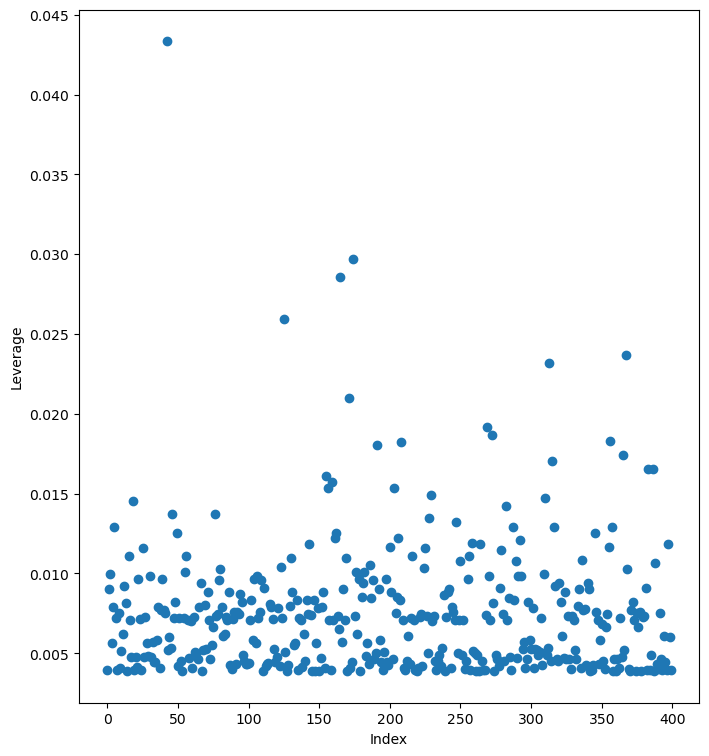

In [35]:
infl = results_small.get_influence()
ax = subplots(figsize=(8, 9))[1]
ax.scatter(np.arange(X_small.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
print(np.argmax(infl.hat_matrix_diag))

**Figure 10.1.** By plotting the influence matrix values for each observation index we can see that the observation with the largest leverage is index 42.  

From the book, observations with $h_{ii} > \frac{2(p + 1)}{n}$ are high leverage. Here $p = 2\times\text{predictors} + \text{intercept}$, $n=400$ so the cut-off is about $2×3/400≈0.015$. Index 42 has a $h_{ii} = 0.12$ which a lot higher than the 0.015 cut-off. Let's also look at the large studentized residuls.

In [42]:
stud   = infl.resid_studentized_external
hi_res = np.where(np.abs(stud) > 3)
print(hi_res)

(array([], dtype=int64),)


We see that there is not studentized residual, or $|t| > 3$ meaning that although there are a few predictors with high leverage, none them have large residuals and so there is no evidence that any single observation unduly influences the fitted model. Therefore the reduced model (Price + US) appears well-behaved with respect to outliers and leverage.

11. **This problem investigates the t-statistic for the null hypothesis** $H_0 : \beta = 0$ **in simple linear regression without an intercept.**

    a) Generate a predictor `x` and a response `y` as follows:

    ```python
    rng = np.random.default_rng(1)
    x = rng.normal(size=100)
    y = 2 * x + rng.normal(size=100)
    ```

    Perform a simple linear regression of `y` onto `x`, without an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this estimate, and the t-statistic and p-value for $H_0 : \beta = 0$. Comment on the results. *(Use `intercept=False` in `ModelSpec()` for regression without an intercept.)*

    b) Perform a simple linear regression of `x` onto `y` without an intercept, and report the same statistics. Comment on the results.

    c) What is the relationship between the results in (a) and (b)?

    d) For the regression of `y` onto `x` without an intercept, the t-statistic takes the form $\hat{\beta} / SE(\hat{\beta})$, with:

    $$
    SE(\hat{\beta}) = \sqrt{ \frac{ \sum (y_i - x_i \hat{\beta})^2 }{ (n - 1) \sum x_i^2 } }
    $$

    Show algebraically and confirm numerically in R that the t-statistic equals:

    $$
    \frac{ \sqrt{n - 1} \sum x_i y_i }{ \sqrt{ \left( \sum x_i^2 \right) \left( \sum y_i^2 \right) - \left( \sum x_i y_i \right)^2 } }
    $$

    e) Using (d), argue that the t-statistic for regression of `y` onto `x` is the same as that for `x` onto `y`.

    f) Using Tython, show that when regression is performed with an intercept, the t-statistic for $H_0 : \beta_1 = 0$ is the same for regression of `y` onto `x` and `x` onto `y`.


11. (ANSWER)

    a)

In [73]:
# Random seed
rng = np.random.default_rng(1)

# Observations
x = rng.normal(size=100)
# Response
y = 2 * x + rng.normal(size=100)

# Convert to a pandas dataframe 
df = pd.DataFrame({'x': x, 'y': y})

# Create the design matrix for x 
X = MS(['x'], intercept=False).fit_transform(df)

# Fit using linear regression of y onto x and summarize results 
resultsyonx = sm.OLS(df['y'], X).fit()
summarize(resultsyonx)

,coef,std err,t,P>|t|
x,1.9762,0.117,16.898,0.0


Table 11.1. The is the summary table for performing a simple linear regression of $\mathbf{y}$ onto $\mathbf{x}$. The value of the regression coefficient is $\hat{\beta}=1.9762$. The standard error is $SE(hat{\beta})=0.117$, which is the estimated standard deviation of the slope estimator across repeated samples. The quantity that measures the average vertical scatter of the data around the fitted line is the residual standard error.  The t-statistic is 16.898 and the p-value is  6.2×10^(−31)
suggesting that there is relationship between $\mathbf{x}$ and $\mathbf{y}$ so we can reject the null hypothesis, $H_0 : \beta=0$.  

11. (ANSWER)

    b)

In [74]:
# Create the design matrix for y 
Y = MS(['y'], intercept=False).fit_transform(df)

# Fit using linear regression of x onto y and summarize results
resultsxony = sm.OLS(df['x'], Y).fit()
summarize(resultsxony)


,coef,std err,t,P>|t|
y,0.3757,0.022,16.898,0.0


**Table 11.2** The is the summary table for performing a simple linear regression of $\mathbf{x}$ onto $\mathbf{y}$. The value of the regression coefficient is $\hat{\beta}=0.3757$. The standard error is $SE=0.022$.  The t-statistic is 16.898 and the p-value is small suggestings that there is relationship between $\mathbf{x}$ and $\mathbf{y}$ so we can reject the null hypothesis, $H_0 : \beta=0$.  

11. (ANSWER)

    c) The relationship between parts a) and b) is the t-statistic is the same, $t=16.898.$ 

11. (ANSWER)
    
    d) We want to show for regressing `y` onto `x` without an intercept, the t-statistic takes the form $\hat{\beta} / SE(\hat{\beta})$ given that 

    $$
    SE(\hat{\beta}) = \sqrt{ \frac{ \sum (y_i - x_i \hat{\beta})^2 }{ (n - 1) \sum x_i^2 } } 
    $$

    and 

    $$\hat{\beta} = \frac{(\sum_{i=1}^n x_i y_i)}{(\sum_{i'=1}^n x_{i'}^2)}.$$

    We want to show algebraically that 

    $$
    \frac{ \sqrt{n - 1} \sum x_i y_i }{ \sqrt{ \left( \sum x_i^2 \right) \left( \sum y_{i'}^2 \right) - \left( \sum x_{i'} y_{i'} \right)^2 }}

    $$



$$
\begin{align*}
tstat(\hat{\beta}) &=\frac{\hat{\beta}}{SE(\hat{\beta})} \\

&=\frac{\frac{\sum x_i y_i}{\sum x_{i'}^2}}{\sqrt{\frac{\sum(y_i - x_i\hat{\beta})^2}{ (n - 1) \sum x_{i'}^2 }}} \\

&=\frac{\sqrt{(n-1)(\sum x_{i'}^2)(\sum (x_i y_i)^2)}}{\sqrt{(\sum(y_i - x_i\hat{\beta})^2)(\sum x_{i'}^2)^2}} \\

&=\frac{\sqrt{(n-1)\sum (x_i y_i)^2}}{\sqrt{\sum(y_i - x_i\hat{\beta})^2\sum x_{i'}^2}}\hspace{.1cm}(a).

\end{align*}
$$

Let's breakdown the residual sum of squares in $\text(a)$:

$$
\begin{align*}
RSS & = \sum(y_i - x_i\hat{\beta})^2 \\
    & = \sum y_i^2 - \sum y_i x_i \hat{\beta} - \sum x_iy_i\hat{\beta}+\sum(x_i\hat{\beta})^2 \\
    & = \sum y_i^2 - 2\hat{\beta}\sum x_i y_i + \hat{\beta^2}\sum{x_i^2} \\
    & = \sum y_i^2 - 2\frac{\sum x_{i'} y_{i'}}{\sum x_{i'}^2}\sum x_i y_i + \left(\frac{\sum x_{i'} y_{i'}}{\sum x_{i'}^2}\right)^2\sum{x_i^2} \\
    & = \sum y_i^2 - 2\frac{\sum (x_{i'}y_{i'})^2}{\sum x_{i'}^2} + \frac{\sum{(x_iy_i)^2}}{\sum x_{i'}^2} \\
    & = \frac{\sum y_i^2\sum x_{i'}^2 - \sum(x_{i'}y_{i'})^2}{\sum x_{i'}^2} 
\end{align*}
$$

and plugging this result back into $(\text{a})$ we get 
$$
\begin{align*}
tstat &=\frac{\sqrt{(n-1)\sum (x_i y_i)^2}}{\sqrt{\frac{\sum y_i^2\sum x_{i'}^2 - \sum(x_{i'}y_{i'})^2}{\sum x_{i'}^2}\sum x_{i'}^2}}\\
&=\frac{\sqrt{(n-1)}\sum x_i y_i}{\sqrt{\sum y_i^2\sum x_{i'}^2 - \sum(x_{i'}y_{i'})^2}}.
\end{align*}
$$

Let's do the same derivation using vector-notation. We can boil down vector notation from the summations at follows

$$\sum_{i=1}^n x_i = \mathbf{1}^T\mathbf{x}$$

$$\sum_{i=1}^n x_i^2 = \mathbf{x}^T\mathbf{x} = ||\mathbf{x}||_2^2$$

which are used in regression as follows 

**sum of residuals:**
$$\sum_{i=1}^n r_i = \mathbf{1}^T\mathbf{r}$$

**residual sum of squares:**
$$\sum_{i=1}^n r_i^2 = \mathbf{r}^T\mathbf{r}$$

**sample mean:**
$$\frac{1}{n}\sum_{i=1}^n y_i = \frac{1}{n}\mathbf{1}^T\mathbf{y}.$$ 



In vector form we have 

$$\hat{\beta} = \frac{\bf{x}^T\bf{y}}{\bf{x}^T{x}}$$

and the t-stat no intercept expression is 

$$\frac{(\sqrt{n-1})\bf{x}^T\bf{y}}{\sqrt{(\bf{x}^T\bf{x})(\bf{y}^T\bf{y}) - (\bf{x}^T\bf{y})^2}}.$$

The vector form of the $RSS$ is 
$$
\begin{align*}
RSS & = ||\bf{y} - \bf{x}\hat{\beta}||^2 \\
    & = (\bf{y} - \bf{x}\hat{\beta})^T(\bf{y} - \bf{x}\hat{\beta})\\
    & = \bf{y}^T\bf{y} - \bf{y}^T\hat{\beta}\bf{x} - \bf{x}^T\hat{\beta}^T\bf{y} + \bf{x}^T\hat{\beta}^T\hat{\beta}\bf{x}\\
\end{align*}
$$

and since $\bf{y}^T\hat{\beta}\bf{x}$ is a scalar then $\bf{y}^T\hat{\beta}\bf{x}=\bf{x}^T\hat{\beta}^T\bf{y}$
$$
\begin{align*}
RSS & = \bf{y}^T\bf{y} - 2\bf{y}^T\hat{\beta}\bf{x} + \bf{x}^T\hat{\beta}^T\hat{\beta}\bf{x}\\
\end{align*}
$$

and $\hat{\beta}$ is a scalar so $\hat{\beta}=\hat{\beta}^T$ and we can factor out $\hat{\beta}$
$$
\begin{align*}
RSS & = \bf{y}^T\bf{y} - 2\hat{\beta}\bf{y}^T\bf{x} + \hat{\beta}^2\bf{x}^T\bf{x}\\
\end{align*}
$$

and substituting in $\hat{\beta}$

$$
\begin{align*}
RSS & = \bf{y}^T\bf{y} - 2\left(\frac{\bf{x}^T\bf{y}}{\bf{x}^T{x}}\right)\bf{y}^T\bf{x} + \left(\frac{\bf{x}^T\bf{y}}{\bf{x}^T{x}}\right)^2\bf{x}^T\bf{x}\\
\end{align*}
$$

and since $\bf{x}^T\bf{y}=(\bf{x}^T\bf{y})^T=\bf{y}^T\bf{x}$

$$
\begin{align*}
RSS & = \bf{y}^T\bf{y} - 2\frac{(\bf{x}^T\bf{y})^2}{\bf{x}^T{x}} + \frac{(\bf{x}^T\bf{y})^2}{\bf{x}^T{x}}\\
& = \frac{(\bf{y}^T\bf{y})(\bf{x}^T\bf{x}) - (\bf{x}^T\bf{y})^2}{\bf{x}^T\bf{x}}\hspace{0.1cm}.
\end{align*}
$$


Let's now substitute this RSS into the t-stat

$$
\begin{align*}
\text{t-stat} & = \frac{\hat{\beta}}{SE(\hat{\beta})} \\
& = \frac{\sqrt{(n-1)(\bf{x}^T{x})}(\bf{x}^T\bf{y})}{\sqrt{{RSS}(\bf{x}^T{x})^2}} \\

& = \frac{\sqrt{(n-1)}\bf{x}^T\bf{y}}{\sqrt{{\frac{(\bf{y}^T\bf{y})(\bf{x}^T\bf{x}) - (\bf{x}^T\bf{y})^2}{\bf{x}^T\bf{x}}}(\bf{x}^T{x})}} \\

& = \frac{\sqrt{(n-1)}\bf{x}^T\bf{y}}{\sqrt{(\bf{y}^T\bf{y})(\bf{x}^T\bf{x}) - (\bf{x}^T\bf{y})^2}}. \\
\end{align*}
$$


11. (ANSWER)

e) If we try to regress $\bf{x}$ onto $\bf{y}$ the $RSS$ is 
    
$$
\begin{align*}
RSS & = ||\bf{x} - \bf{y}\hat{\beta}||^2 \\
    & = (\bf{x} - \bf{y}\hat{\beta})^T(\bf{x} - \bf{y}\hat{\beta})\\
    & = \bf{x}^T\bf{x} - \bf{x}^T\hat{\beta}\bf{y} - \bf{y}^T\hat{\beta}^T\bf{x} + \bf{y}^T\hat{\beta}^T\hat{\beta}\bf{y}\\
    & = \bf{x}^T\bf{x} - 2\hat{\beta}\bf{x}^T\bf{y}  + \hat{\beta}^2\bf{y}^T\bf{y}\\
\end{align*}
$$

and then we want to minimize $RSS$

$$
\begin{align*}
\frac{\partial RSS}{\partial\hat{\beta}} & = 0 = -2\bf{x}^T\bf{y} + 2\hat{\beta}\bf{y}^T\bf{y}\\
\end{align*}
$$

and solving for $\hat{\beta}$

$$\hat{\beta} = \frac{\bf{x}^T\bf{y}}{\bf{y}^T\bf{y}}.$$

Therefore, the t-stat will be 

$$
\begin{align*}
\text{t-stat} &= \frac{\sqrt{(n-1)}\bf{x}^T\bf{y}}{\sqrt{{\frac{(\bf{x}^T\bf{x})(\bf{y}^T\bf{y}) - (\bf{x}^T\bf{y})^2}{\bf{y}^T\bf{y}}}(\bf{y}^T{y})}}\\
&= \frac{\sqrt{(n-1)}\bf{x}^T\bf{y}}{\sqrt{(\bf{y}^T\bf{y})(\bf{x}^T\bf{x}) - (\bf{x}^T\bf{y})^2}}.\\
\end{align*}
$$



11. (ANSWER)

f) We want to the t-stat for regressing y onto x is the same as regressing x onto y for the intercept case.

The true relationship between $x$ and $y$ is 

$$y_i = \beta_0 + \beta_1x_i + \epsilon.$$

The estimate for regressing $y$ onto $x$ is 

$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1x_i$$ 

and the RSS is 

$$
\begin{align*}
RSS &= e_1^2 + e_2^2 + \cdots + e_n^2 \\
&= (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + \cdots + (y_n - \hat{y}_n)^2 \\
&= (y_1 - \hat{\beta}_0 - \hat{\beta}_1x_1)^2 + (y_2 - \hat{\beta}_0 - \hat{\beta}_1x_2)^2 + \cdots + (y_n - \hat{\beta}_0 - \hat{\beta}_1x_n)^2 \\
& = \sum_{i=1}^n(y_i - \hat{\beta}_0 - \hat{\beta}_1x_i)^2
\end{align*}
$$

which can be used to find $\hat{\beta}_0$ and $\hat{\beta}_1$ using least squares

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}$$ 

and 

$$\hat{\beta}_1 = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}.$$


Also, the standard error associated with $\hat{\beta}_0$, $\hat{\beta}_1$

$$SE(\hat{\beta}_0) = \sigma\sqrt{\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n(x_i - \bar{x})^2}}$$

$$SE(\hat{\beta}_1) = \frac{\sigma}{\sum_{i=1}^n(x_i - \bar{x})}$$

and so the t-stats are 

$$tstat(\hat{\beta}_0)=\frac{\hat{\beta}_0}{SE(\hat{\beta}_0)}$$

$$tstat(\hat{\beta}_1)=\frac{\hat{\beta}_1}{SE(\hat{\beta}_1)}.$$

In [5]:
# Random seed
rng = np.random.default_rng(1)

# Observations
x = rng.normal(size=100)
# Response
y = 2 * x + rng.normal(size=100)

# Convert to a pandas dataframe 
df = pd.DataFrame({'x': x, 'y': y})

# Create the design matrix for x 
X = MS(['x']).fit_transform(df)

# Fit using linear regression of y onto x and summarize results 
resultsyonx = sm.OLS(df['y'], X).fit()
summarize(resultsyonx)

,coef,std err,t,P>|t|
intercept,-0.0760,0.101,-0.756,0.451
x,1.9686,0.118,16.734,0.000


**Table 11.3** The t-stat for regressing $\bf{y}$ onto $\bf{x}$ with intercept is 16.734. 

In [6]:
# Create the design matrix for y 
Y = MS(['y']).fit_transform(df)

# Fit using linear regression of x onto y and summarize results
resultsxony = sm.OLS(df['x'], Y).fit()
summarize(resultsxony)


,coef,std err,t,P>|t|
intercept,0.0095,0.044,0.216,0.829
y,0.3763,0.022,16.734,0.000


**Table 11.4** The t-stat for regressing $\bf{x}$ onto $\bf{y}$ is also 16.734. 

12. Simple linear regression without an intercept.

      a) Recall $\hat{\beta}$ from equation (3.38). Under what condition is $\hat{\beta}_{XY} = \hat{\beta}_{YX}$?

      b) Generate an example in Python with $n = 100$ observations in
      which the coefficient estimate for the regression of $X$ onto $Y$
      is different from the coefficient estimate for the regression of $Y$
      onto $X$.

      c) Generate an example in Python with $n = 100$ observations in
      which the coefficient estimate for the regression of $X$ onto $Y$
      is the same from the coefficient estimate for the regression of $Y$
      onto $X$.


12. (ANSWER)

a) We want to find when $\hat{\beta}_{YX} = \hat{\beta}_{XY}$, where 

$$\hat{\beta}_{XY} = \frac{\sum x_i y_i}{\sum x_i^2}$$ 

and 


$$\hat{\beta}_{YX} = \frac{\sum x_i y_i}{\sum y_i^2}.$$

Therefore, $\hat{\beta}_{YX} = \hat{\beta}_{XY}$ when $\sum x_i^2 = \sum y_i^2$. 


12. (ANSWER)

    b)


In [88]:
rng = np.random.default_rng(42)

# Generate an example where the two estimates are the same
x = rng.normal(size=100)
y = 2 * x

df = pd.DataFrame({'x': x, 'y': y})

# Create the design matrix 
X = MS(['x'], intercept=False).fit_transform(df)
# Regress y on x 
resultsyonx = sm.OLS(df['y'], X).fit()
print("beta_xy = ", resultsyonx.fittedvalues[1])

# Create the design matrix 
Y1 = MS(['y'], intercept=False).fit_transform(df)
# Regress x on y 
resultsxony = sm.OLS(df['x'], Y).fit()
print("beta_yx = ", resultsxony.fittedvalues[1])


beta_xy =  -2.079968212480992
beta_yx =  -0.03144824890192905


12. (ANSWER)

    c) To generate a Python example we can do the following: 

In [87]:
rng = np.random.default_rng(42)

# Generate an example where the two estimates are the same
x1 = rng.normal(size=100)
y1 = -x1

df1 = pd.DataFrame({'x1': x1, 'y1': y1})

# Create the design matrix 
X1 = MS(['x1'], intercept=False).fit_transform(df1)
# Regress y on x 
resultsyonx = sm.OLS(df1['y1'], X1).fit()
print("beta_xy = ", resultsyonx.fittedvalues[1])

# Create the design matrix 
Y1 = MS(['y1'], intercept=False).fit_transform(df1)
# Regress x on y 
resultsxony = sm.OLS(df1['x1'], Y1).fit()
print("beta_yx = ", resultsxony.fittedvalues[1])



beta_xy =  1.039984106240496
beta_yx =  -1.039984106240496



13. Simulating data and fitting simple linear regression models.

      a) Generate `x`: 100 samples from \( N(0, 1) \).

      b) Generate `eps`: 100 samples from \( N(0, 0.25) \).

      c) Let $y = -1 + 0.5x + \epsilon$. What is the length of `y`? Identify $ \beta_0$ and $\beta_1$.

      d) Create a scatterplot of `x` vs `y`. Comment.

      e) Fit a least squares model to predict `y` from `x`. Compare $\hat{\beta}_0, \hat{\beta}_1$ to the true values.

      f) Plot the regression line from (e) and the true line. Use `legend()` to label them.

      g) Fit a quadratic regression model with `x` and `x^2`. Does the quadratic term help? Explain.

      h) Repeat (a)-(f) with less noise (smaller error variance). Comment.

      i) Repeat (a)-(f) with more noise (larger error variance). Comment.

      j) Report confidence intervals for $\beta_0, \beta_1$ across all three datasets (original, noisier, less noisy). Comment.

13. (ANSWER)

    a) 

In [6]:
# Generate 100 samples drawn from Normal(0, 1)
rng = np.random.default_rng(1)
x = rng.standard_normal(100)


13. (ANSWER)

    b)

In [7]:
# Generate 100 samples from Normal(0, 0.25) 
epsilon = rng.normal(scale=np.sqrt(0.25), size=100)


13. (ANSWER)

    c) $\beta_0 = -1$ and $\beta_1 = 0.5$

In [8]:
y = -1 + 0.5 * x  + epsilon
print('The length of y is:', y.shape[0])

The length of y is: 100


13. (ANSWER)

    d) 

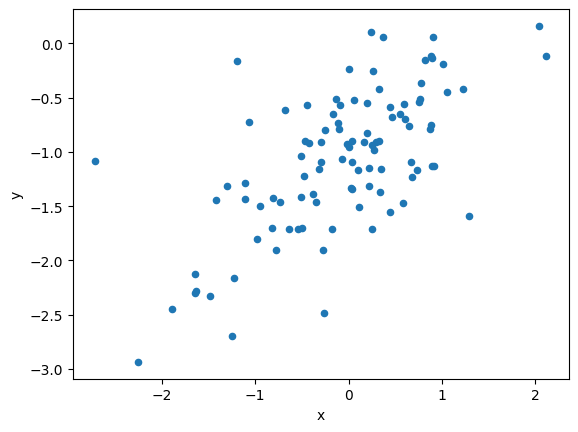

In [9]:
df = pd.DataFrame({'x': x, 'y': y})
ax = df.plot.scatter('x', 'y')

**Figure 13.1** For the scatterplot, we see that there appears to be a linear relationship between $x$ and $y$. 

13. (ANSWER)

    e) 

In [10]:
# Create the design matrix 
X = MS(['x']).fit_transform(df)
y = df['y']
results = sm.OLS(y, X).fit()
summarize(results)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.79
Date:                Thu, 29 May 2025   Prob (F-statistic):           8.04e-13
Time:                        11:35:02   Log-Likelihood:                -71.745
No. Observations:                 100   AIC:                             147.5
Df Residuals:                      98   BIC:                             152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0380      0.050    -20.647      0.000      -1.138      -0.938
x              0.4843      0.059      8.233      0.000       0.368       0.601
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Figure 13.2** The fit gives us $\hat{\beta_0}=-1.0810$ and $\hat{\beta_1}=0.4936$, which is close to the actual values. 

In [11]:
def abline(ax, b, m, *args, **kwargs): 
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

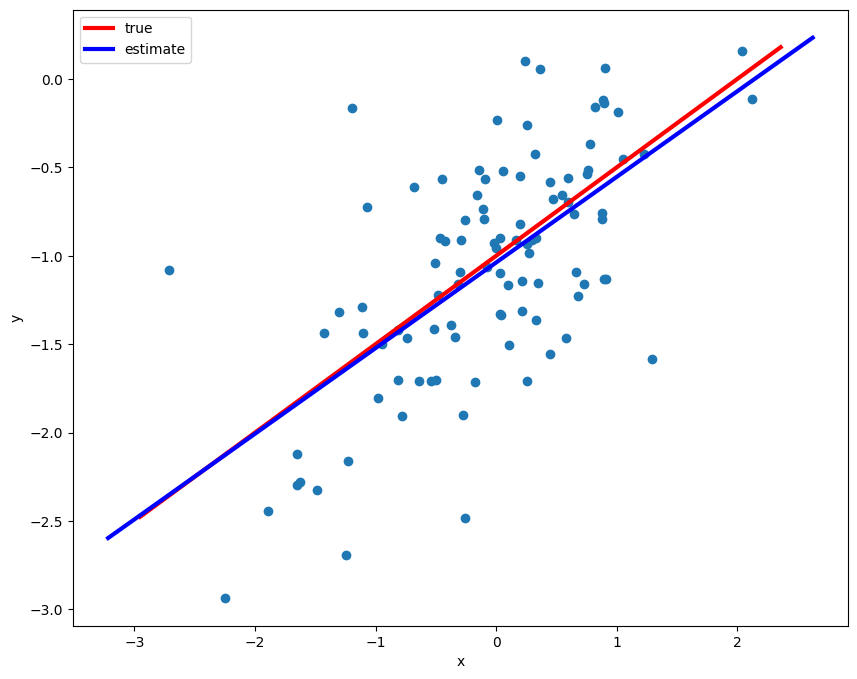

In [30]:
fig, ax = subplots(figsize=(10, 8))
ax.scatter(df['x'], df['y'])
beta_vals = [-1, 0.5]
betahat_vals = [results.params.iloc[0], results.params.iloc[1]] 
color_vals = ['red', 'blue']
labels = ['true', 'estimate']
pairs = [(beta_vals[0], beta_vals[1]), 
         (betahat_vals[0], betahat_vals[1]),
         ]
for (b, m), color, label in zip(pairs, color_vals, labels): 
    abline(ax, b, m, color=color, linewidth=3, label=label)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [ ]:
Figure 

14. Collinearity problem.

    a) Run:

    ```python
    rng = np.random.default_rng(10)
    x1 = rng.uniform(0, 1, size=100)
    x2 = 0.5 * x1 + rng.normal(size=100) / 10
    y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
    ```
    Write the model equation and identify the coefficients.

    b) Compute correlation between `x1` and `x2`. Plot their relationship.

    c) Regress `y` on `x1` and `x2`. Report $\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2$ and compare to the true values. Can you reject $H_0 : \beta_1 = 0 $? $H_0 : \beta_2 = 0$?

    d) Regress `y` on `x1` only. Comment. Can you reject $H_0 : \beta_1 = 0$?

    e) Regress `y` on `x2` only. Can you reject $H_0 : \beta_1 = 0$?

    f) Do results from (c)–(e) contradict? Explain.

    g) Add a mismeasured point:

    ```python
    x1 = np.concatenate([x1, [0.1]])
    x2 = np.concatenate([x2, [0.8]])
    y = np.concatenate([y, [6]])
    ```
    Re-fit models from (c)–(e). Is this point an outlier, a high-leverage point, or both? Explain.

15. Boston data set — predicting per capita crime rate.

    a) For each predictor, fit a simple linear regression model for the response. Which are statistically significant? Support with plots.

    b) Fit a multiple regression using all predictors. Which coefficients reject \( H_0 : \beta_j = 0 \)?

    c) Compare (a) and (b). Plot univariate coefficients on x-axis, multiple regression coefficients on y-axis (one point per predictor).

    d) Test for nonlinear relationships: For each predictor `X`, fit
      $$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon \$$
      
      and evaluate evidence of nonlinearity.

